In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore',category=FutureWarning)

In [73]:
data = pd.read_excel("C:/Users/tusha/Downloads/Association Rules/Association Rules/Online retail.xlsx",header=None)
data.head()

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [74]:
data['Transaction'] = data.iloc[:,0].apply(lambda x:x.split(','))

In [77]:
transactions = data['Transaction'].tolist()
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [79]:
from mlxtend.preprocessing import TransactionEncoder

In [80]:
te = TransactionEncoder()

In [81]:
te.fit(transactions)

TransactionEncoder()

In [85]:
data = te.transform(transactions)

In [87]:
df = pd.DataFrame(data,columns=te.columns_)
df = df.astype(int)
df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Data Exploration

In [90]:
# Products
count = df.loc[:,:].sum()
count

 asparagus             1
almonds              153
antioxydant juice     67
asparagus             35
avocado              250
                    ... 
whole wheat pasta    221
whole wheat rice     439
yams                  86
yogurt cake          205
zucchini              71
Length: 120, dtype: int64

In [92]:
df.shape

(7501, 120)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Columns: 120 entries,  asparagus to zucchini
dtypes: int32(120)
memory usage: 3.4 MB


## Data Visualization

mineral water        1788
eggs                 1348
spaghetti            1306
french fries         1282
chocolate            1229
green tea             991
milk                  972
ground beef           737
frozen vegetables     715
pancakes              713
burgers               654
cake                  608
cookies               603
escalope              595
low fat yogurt        574
dtype: int64


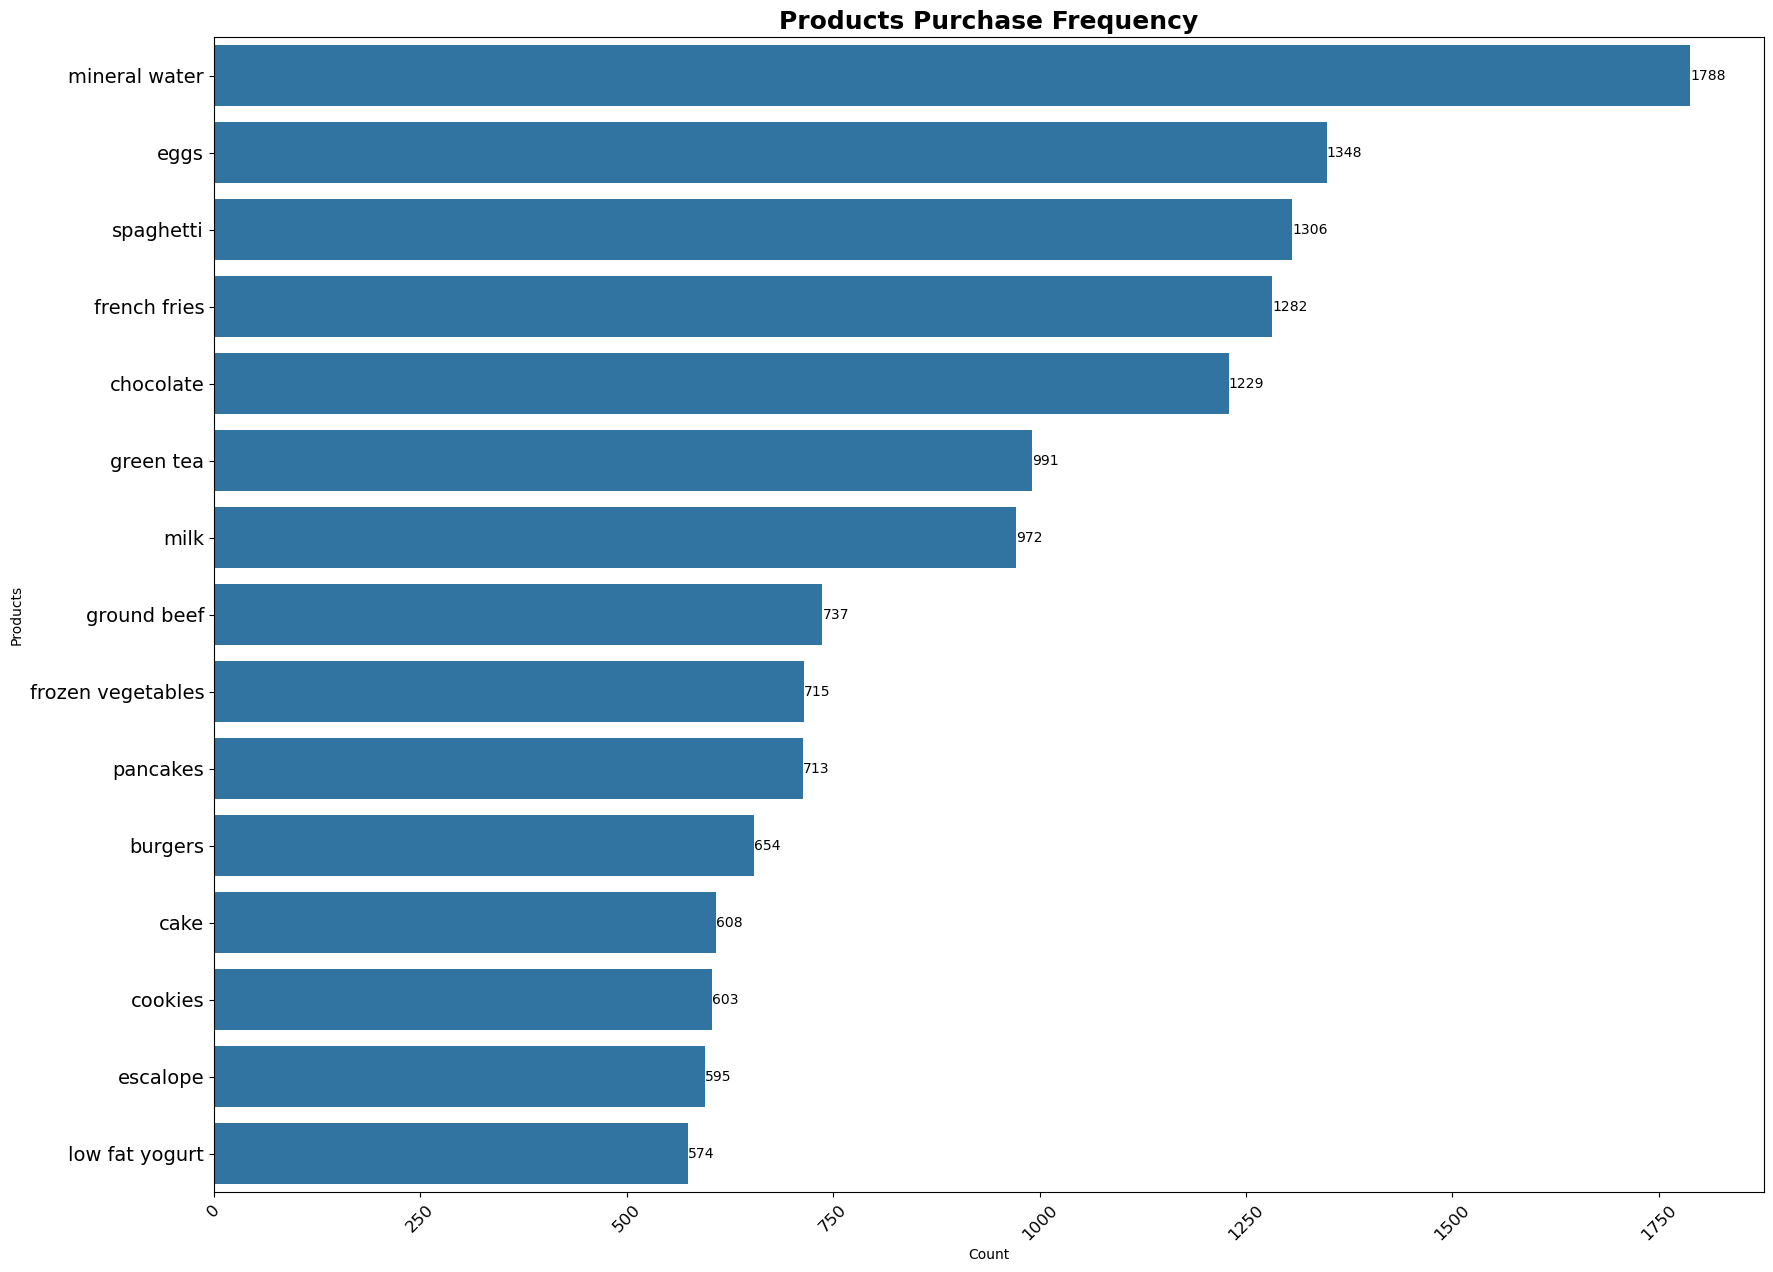

In [97]:
# top 15 Popular Products
top_15 = count.sort_values(ascending=False).head(15)
print(top_15)
# Convert to DataFrame
top_15_df = top_15.reset_index()
top_15_df.columns = ['Products','Count']

# Plotting
plt.figure(figsize=(20,15))
ax = sns.barplot(x='Count',y='Products',data=top_15_df)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=45,fontsize=12)
plt.title('Products Purchase Frequency', fontsize=18, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

## Observations:
### Most frequent purchased products are : minreal water, eggs, spaghetti, french fries, chocolate
## Support and Length
### If we divide all the items with row number, we can find Support value. Our threshold value is 0.1 for Support value.

In [100]:
len(df)

7501

In [102]:
# Product frequency / Total Sales
first = pd.DataFrame(df.sum() / df.shape[0],columns = ['Support']).sort_values("Support",ascending=False)
first

,Support
mineral water,0.238368
eggs,0.179709
spaghetti,0.174110
french fries,0.170911
chocolate,0.163845
...,...
bramble,0.001866
cream,0.000933
napkins,0.000667
water spray,0.000400


In [104]:
# Elimination  by Support Value
first[first.Support>=0.1]

,Support
mineral water,0.238368
eggs,0.179709
spaghetti,0.174110
french fries,0.170911
chocolate,0.163845
green tea,0.132116
milk,0.129583


In [106]:
second = list(itertools.combinations(first.index,2))
second = [list(i) for i in second]
second[:15]

[['mineral water', 'eggs'],
 ['mineral water', 'spaghetti'],
 ['mineral water', 'french fries'],
 ['mineral water', 'chocolate'],
 ['mineral water', 'green tea'],
 ['mineral water', 'milk'],
 ['mineral water', 'ground beef'],
 ['mineral water', 'frozen vegetables'],
 ['mineral water', 'pancakes'],
 ['mineral water', 'burgers'],
 ['mineral water', 'cake'],
 ['mineral water', 'cookies'],
 ['mineral water', 'escalope'],
 ['mineral water', 'low fat yogurt'],
 ['mineral water', 'shrimp']]

In [107]:
# Finding support values
value = []
for i in range(0, len(second)):
    temp = df.T.loc[second[i]].sum() 
    temp = len(temp[temp == df.T.loc[second[i]].shape[0]]) / df.shape[0]
    value.append(temp)
# Create a data frame            
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.02]
secondIteration

,Support,length
index,,
"(mineral water, spaghetti)",0.059725,2
"(mineral water, chocolate)",0.052660,2
"(mineral water, eggs)",0.050927,2
"(mineral water, milk)",0.047994,2
"(mineral water, ground beef)",0.040928,2
"(spaghetti, ground beef)",0.039195,2
"(spaghetti, chocolate)",0.039195,2
"(eggs, spaghetti)",0.036528,2
"(eggs, french fries)",0.036395,2


In [109]:
second = list(itertools.combinations(first.index,4))
second = [list(i) for i in second]
second[:10]

[['mineral water', 'eggs', 'spaghetti', 'french fries'],
 ['mineral water', 'eggs', 'spaghetti', 'chocolate'],
 ['mineral water', 'eggs', 'spaghetti', 'green tea'],
 ['mineral water', 'eggs', 'spaghetti', 'milk'],
 ['mineral water', 'eggs', 'spaghetti', 'ground beef'],
 ['mineral water', 'eggs', 'spaghetti', 'frozen vegetables'],
 ['mineral water', 'eggs', 'spaghetti', 'pancakes'],
 ['mineral water', 'eggs', 'spaghetti', 'burgers'],
 ['mineral water', 'eggs', 'spaghetti', 'cake'],
 ['mineral water', 'eggs', 'spaghetti', 'cookies']]

## Association Rules
There are two main functions here.

apriori() function evaluate support value for each product.
association_rules() function help us to understand relationship between antecedents and consequences products. It gives some remarkable information about products.
Especially, "antecedent support", "consequent support", "support", "confidence" and "lift" variables are very important to make some business decisions.

To construct association rules between elements or items, the algorithm considers 3 important factors which are, support, confidence and lift. Each of these factors is explained as follows:

Support: The support of item I is defined as the ratio between the number of transactions containing the item I by the total number of transactions expressed as :

Support(I)=Number of transactions containing I/Total number of Transactions

Confidence: This is measured by the proportion of transactions with item I1, in which item I2 also appears. The confidence between two items I1 and I2, in a transaction is defined as the total number of transactions containing both items I1 and I2 divided by the total number of transactions containing I1.

Confidence(I1->I2)=Number of Transactions containing I1 and I2/(Total Number of Transactions containing I1)

Lift: Lift is the ratio between the confidence and support expressed as :

Lift(I1->I2)=Confidence(I1->I2)/Support(I2)

## Association rules with 1% Support and 30% confidence

In [112]:
# With 10% Support
frequent_itemsets=apriori(df,min_support=0.01,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.020397,(almonds),1
1,0.033329,(avocado),1
2,0.010799,(barbecue sauce),1
3,0.014265,(black tea),1
4,0.011465,(body spray),1
...,...,...,...
252,0.011065,"(milk, mineral water, ground beef)",3
253,0.017064,"(spaghetti, mineral water, ground beef)",3
254,0.015731,"(spaghetti, milk, mineral water)",3
255,0.010265,"(olive oil, spaghetti, mineral water)",3


In [113]:
# with 30% Confidence
rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,1.0,0.003654,1.168147,0.325896,0.044593,0.143943,0.198329
1,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,1.0,0.013128,1.224818,0.499424,0.120941,0.183552,0.245256
2,(cake),(mineral water),0.081056,0.238368,0.027463,0.338816,1.421397,1.0,0.008142,1.151921,0.322617,0.094064,0.131885,0.227014
3,(cereals),(mineral water),0.025730,0.238368,0.010265,0.398964,1.673729,1.0,0.004132,1.267198,0.413162,0.040441,0.210857,0.221014
4,(chicken),(mineral water),0.059992,0.238368,0.022797,0.380000,1.594172,1.0,0.008497,1.228438,0.396502,0.082729,0.185958,0.237819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,"(milk, mineral water)",(spaghetti),0.047994,0.174110,0.015731,0.327778,1.882589,1.0,0.007375,1.228597,0.492451,0.076227,0.186063,0.209065
59,"(olive oil, spaghetti)",(mineral water),0.022930,0.238368,0.010265,0.447674,1.878079,1.0,0.004799,1.378954,0.478514,0.040892,0.274813,0.245370
60,"(olive oil, mineral water)",(spaghetti),0.027596,0.174110,0.010265,0.371981,2.136468,1.0,0.005460,1.315071,0.547034,0.053621,0.239585,0.215470
61,"(spaghetti, pancakes)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,1.0,0.005459,1.397557,0.488452,0.045479,0.284466,0.251562


### *Antecedent support variable tells us probability of antecedent products alone
### *Consequents support variable tells us probability of consequents products alone
### *The support value is the value of the two products (Antecedents and Consequents)
### *Confidence is an indication of how often the rule has been found to be true.
### *The ratio of the observed support to that expected if X and Y were independent.

In [115]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
14,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,1.0,0.011138,1.332860,0.732460,0.121457,0.249734,0.243136
56,"(mineral water, ground beef)",(spaghetti),0.040928,0.174110,0.017064,0.416938,2.394681,1.0,0.009938,1.416470,0.607262,0.086195,0.294020,0.257474
51,"(mineral water, frozen vegetables)",(milk),0.035729,0.129583,0.011065,0.309701,2.389991,1.0,0.006435,1.260929,0.603138,0.071737,0.206934,0.197546
22,(soup),(milk),0.050527,0.129583,0.015198,0.300792,2.321232,1.0,0.008651,1.244861,0.599484,0.092158,0.196697,0.209038
16,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,1.0,0.022088,1.373997,0.624943,0.168096,0.272197,0.312015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,(frozen smoothie),(mineral water),0.063325,0.238368,0.020264,0.320000,1.342461,1.0,0.005169,1.120047,0.272346,0.072004,0.107180,0.202506
19,(honey),(mineral water),0.047460,0.238368,0.015065,0.317416,1.331619,1.0,0.003752,1.115806,0.261443,0.055638,0.103787,0.190307
20,(low fat yogurt),(mineral water),0.076523,0.238368,0.023997,0.313589,1.315565,1.0,0.005756,1.109585,0.259747,0.082493,0.098762,0.207130
9,(fresh bread),(mineral water),0.043061,0.238368,0.013332,0.309598,1.298820,1.0,0.003067,1.103171,0.240424,0.049727,0.093522,0.182763


In [116]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,1.0,0.003654,1.168147,0.325896,0.044593,0.143943,0.198329
1,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,1.0,0.013128,1.224818,0.499424,0.120941,0.183552,0.245256
2,(cake),(mineral water),0.081056,0.238368,0.027463,0.338816,1.421397,1.0,0.008142,1.151921,0.322617,0.094064,0.131885,0.227014
3,(cereals),(mineral water),0.025730,0.238368,0.010265,0.398964,1.673729,1.0,0.004132,1.267198,0.413162,0.040441,0.210857,0.221014
4,(chicken),(mineral water),0.059992,0.238368,0.022797,0.380000,1.594172,1.0,0.008497,1.228438,0.396502,0.082729,0.185958,0.237819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,"(milk, mineral water)",(spaghetti),0.047994,0.174110,0.015731,0.327778,1.882589,1.0,0.007375,1.228597,0.492451,0.076227,0.186063,0.209065
59,"(olive oil, spaghetti)",(mineral water),0.022930,0.238368,0.010265,0.447674,1.878079,1.0,0.004799,1.378954,0.478514,0.040892,0.274813,0.245370
60,"(olive oil, mineral water)",(spaghetti),0.027596,0.174110,0.010265,0.371981,2.136468,1.0,0.005460,1.315071,0.547034,0.053621,0.239585,0.215470
61,"(spaghetti, pancakes)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,1.0,0.005459,1.397557,0.488452,0.045479,0.284466,0.251562


## Visualization of obtained rule

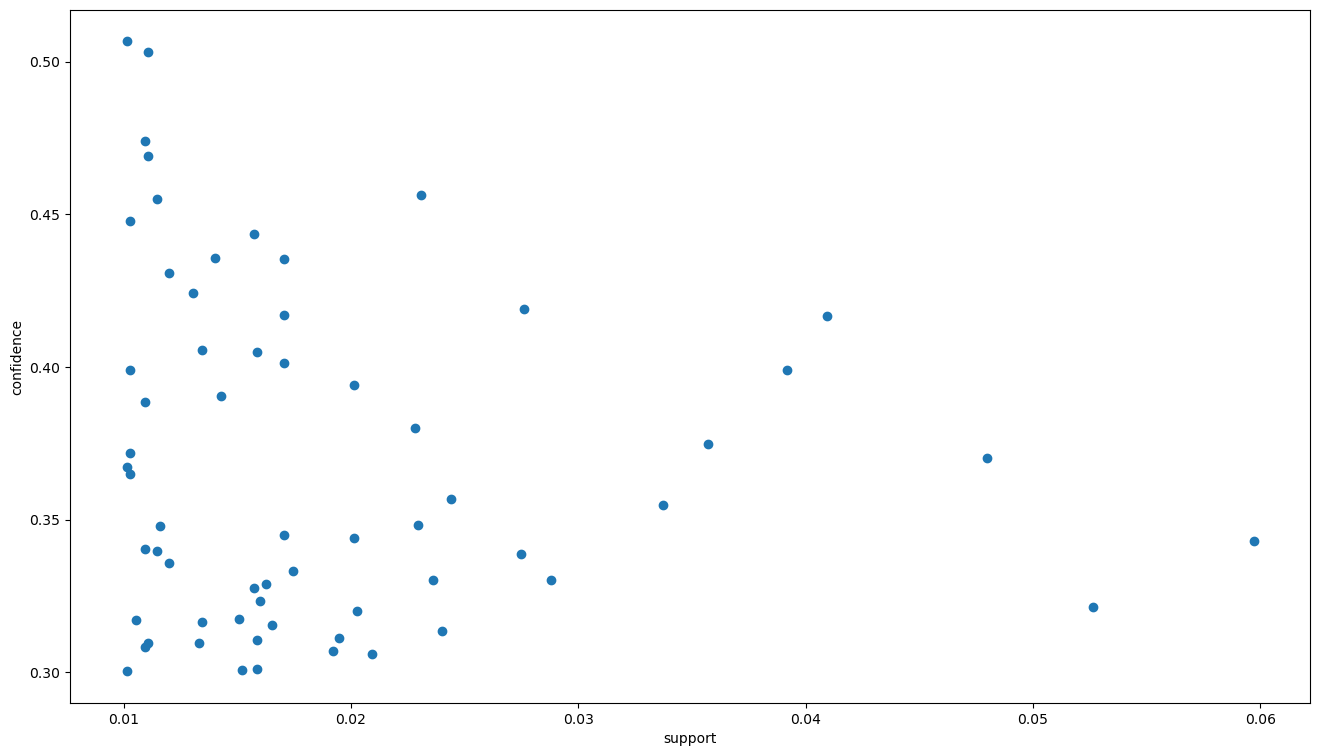

In [118]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [125]:
matrix = lift.pivot(index="antecedents", columns="consequents", values="lift")
matrix

consequents,(mineral water),(eggs),(spaghetti),(ground beef),(milk),(chocolate)
antecedents,,,,,,
(avocado),1.459926,NaN,NaN,NaN,NaN,NaN
(shrimp),1.385352,NaN,NaN,NaN,NaN,NaN
(tomatoes),1.496530,NaN,1.757755,NaN,NaN,NaN
(whole wheat rice),1.442993,NaN,NaN,NaN,NaN,NaN
"(eggs, chocolate)",1.701663,NaN,1.822232,NaN,NaN,NaN
"(ground beef, chocolate)",1.988472,NaN,NaN,NaN,NaN,NaN
"(milk, chocolate)",1.827780,NaN,1.954217,NaN,NaN,NaN
"(mineral water, chocolate)",NaN,NaN,1.730318,NaN,NaN,NaN
(salmon),1.683336,NaN,1.818472,NaN,NaN,NaN


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, "frozenset({'mineral water'})"),
  Text(1.5, 0, "frozenset({'eggs'})"),
  Text(2.5, 0, "frozenset({'spaghetti'})"),
  Text(3.5, 0, "frozenset({'ground beef'})"),
  Text(4.5, 0, "frozenset({'milk'})"),
  Text(5.5, 0, "frozenset({'chocolate'})")])

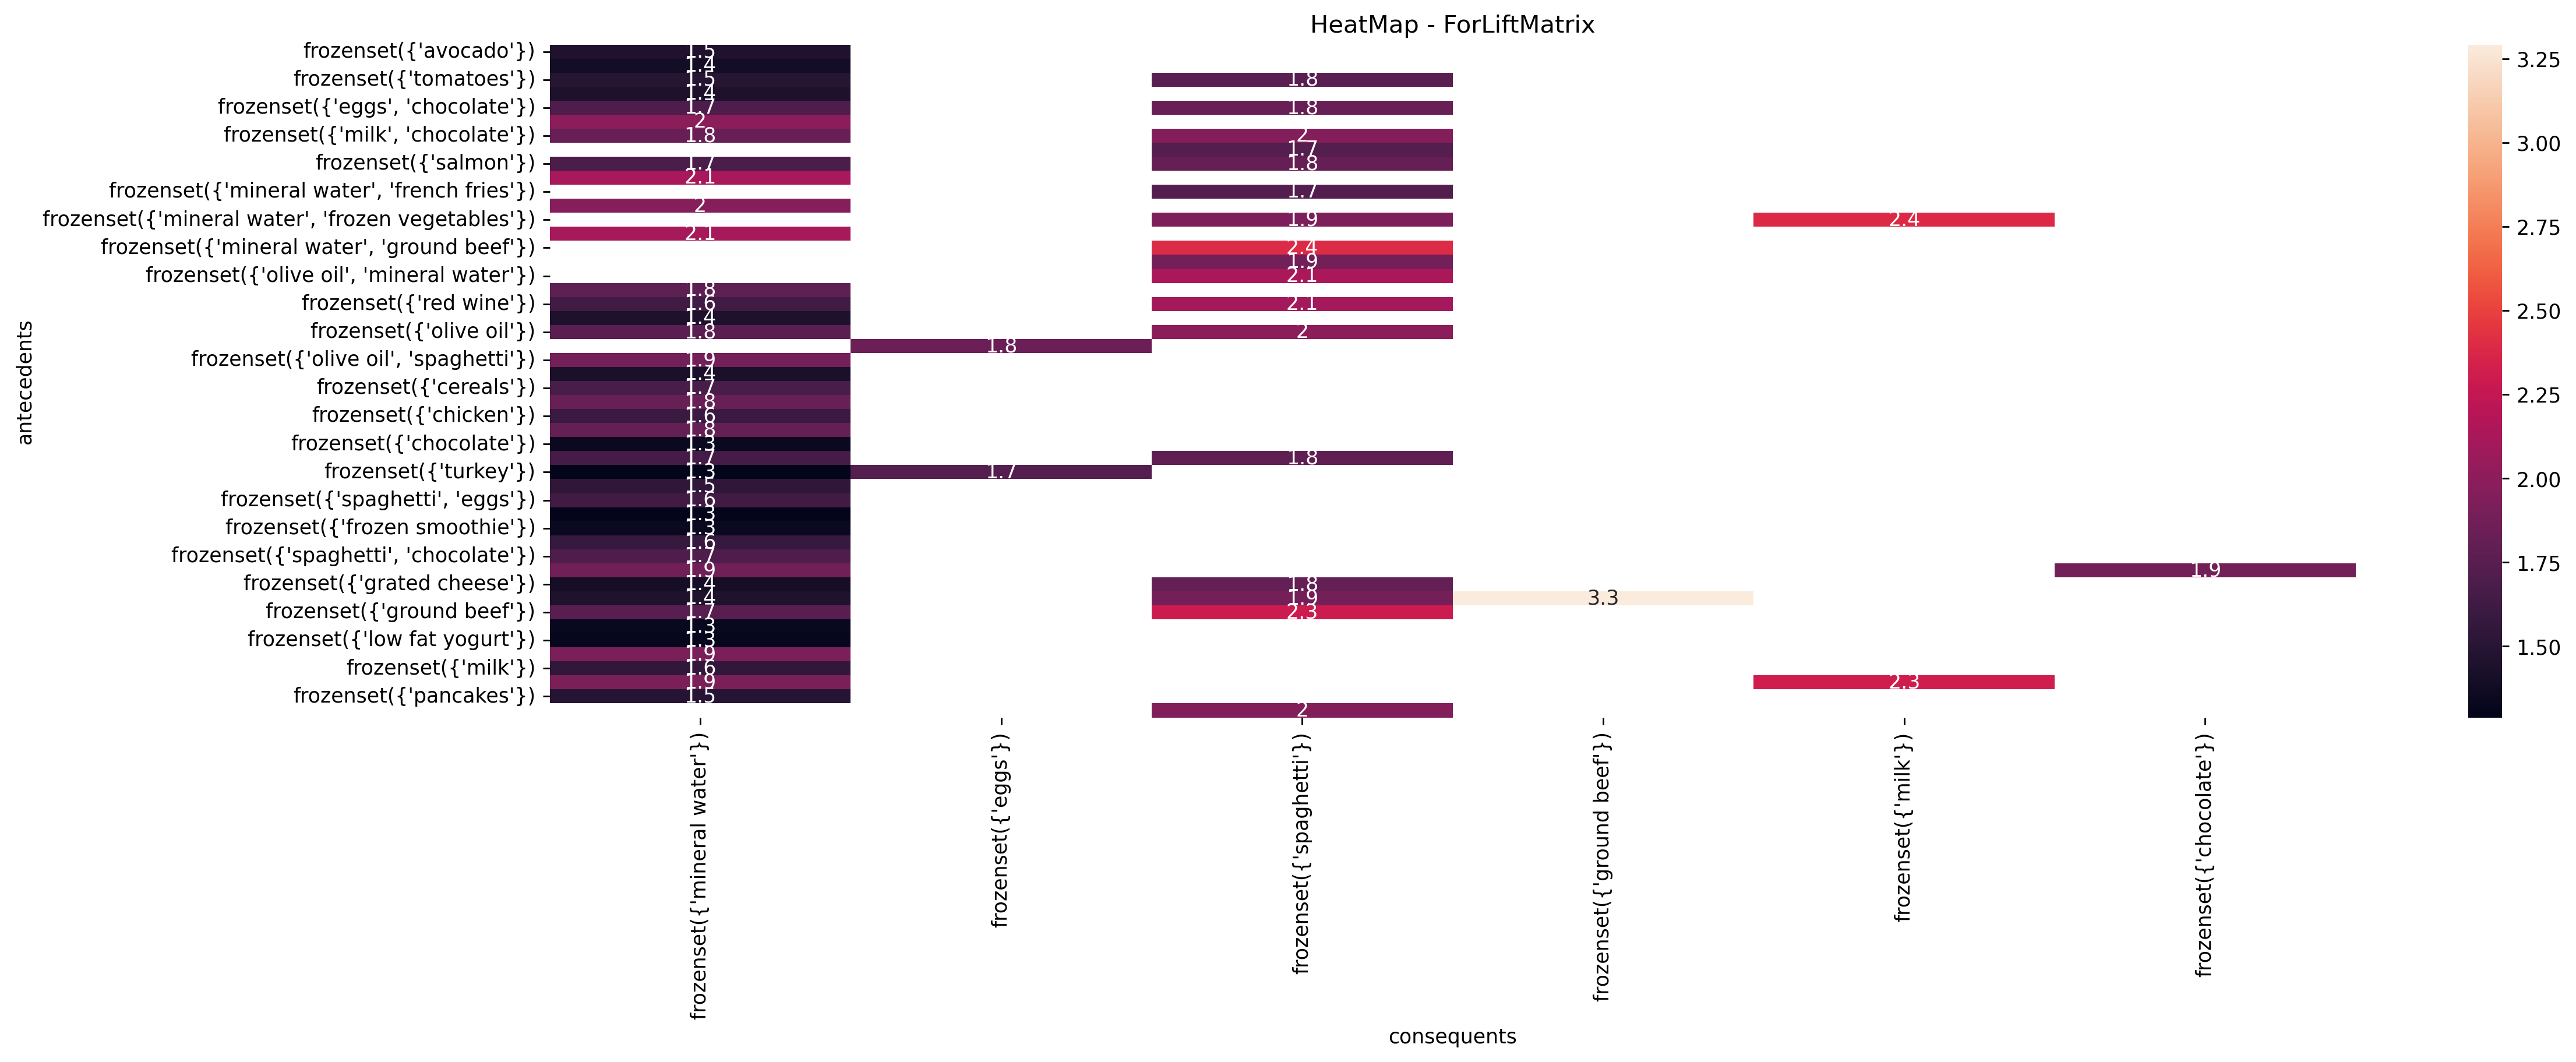

In [127]:
plt.figure(figsize=(20,6),dpi=250)
sns.heatmap(matrix,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

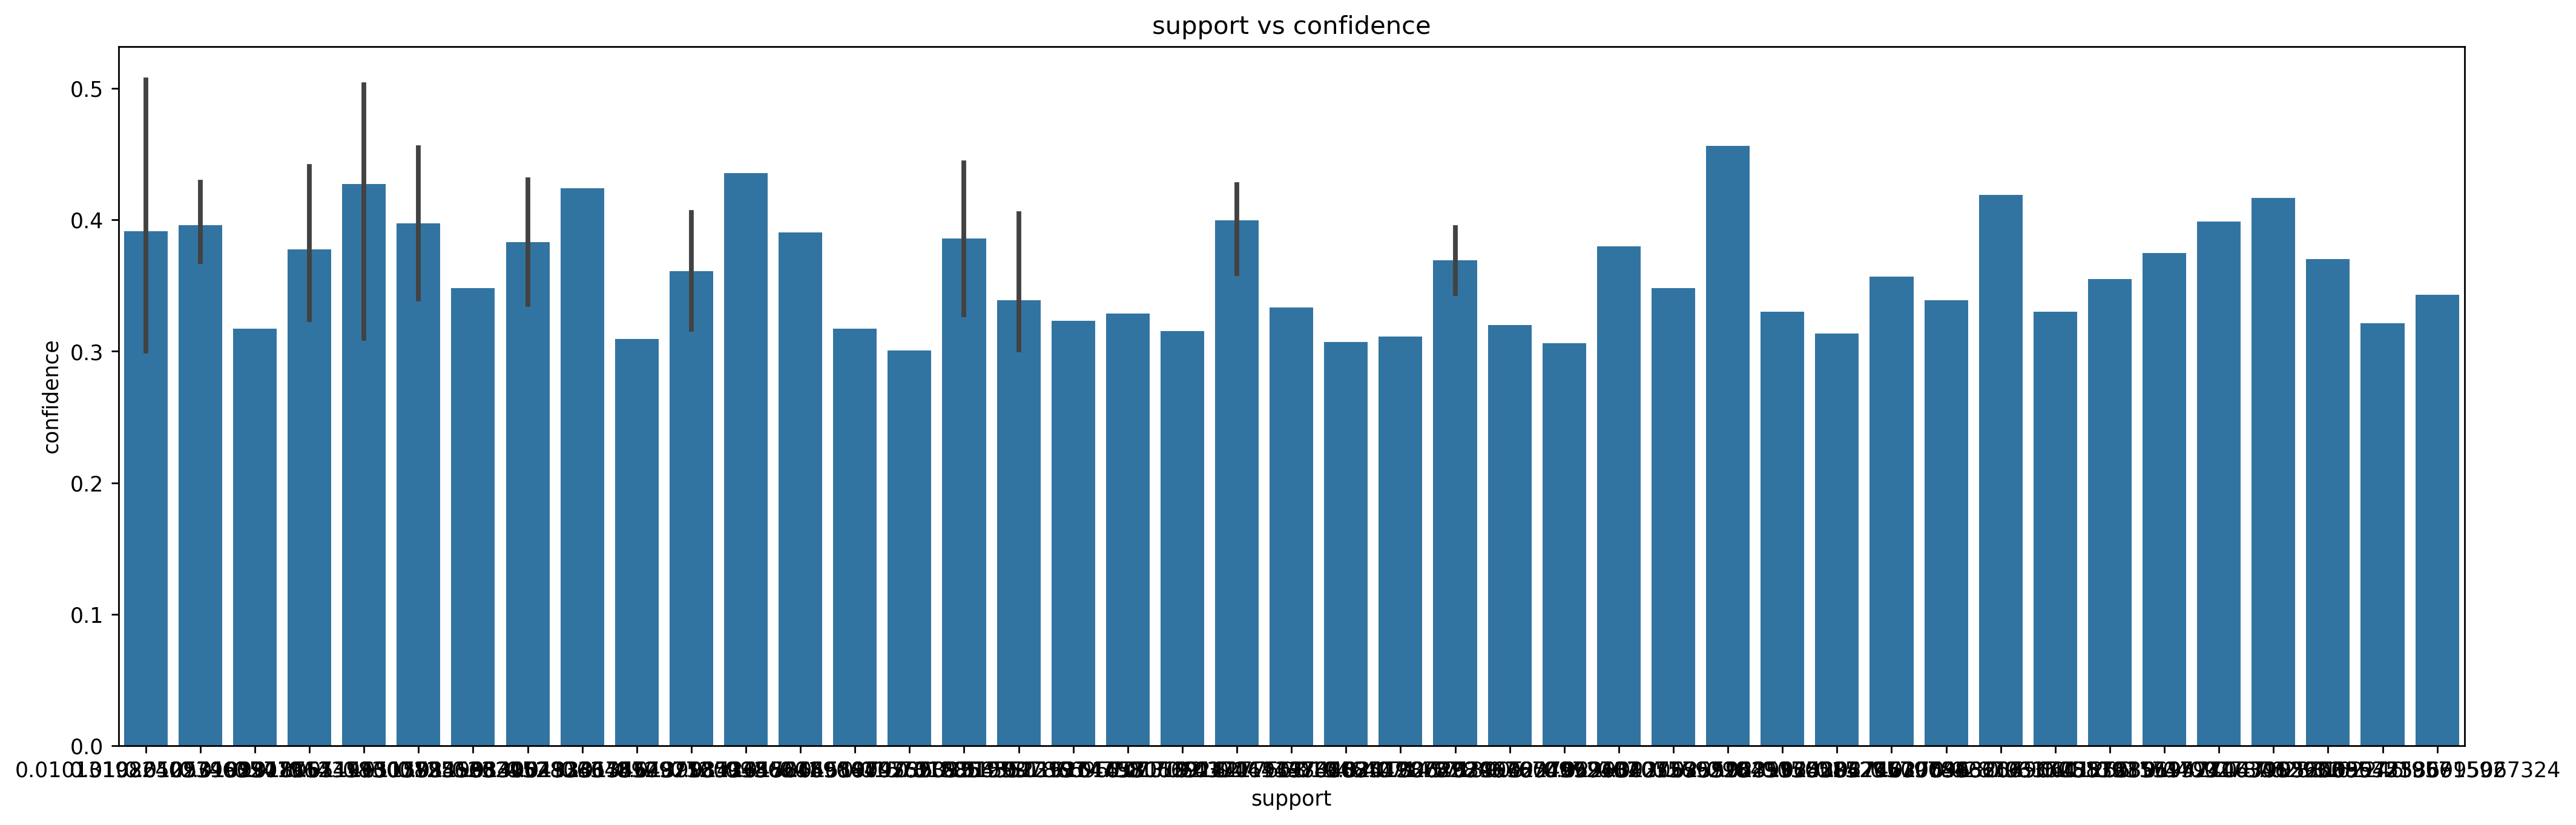

In [129]:
plt.figure(figsize=(20,6),dpi=250)
sns.barplot(x="support",y="confidence",data=lift)
plt.title("support vs confidence")
plt.show()

Text(0.5, 1.0, 'lift vs Confidence')

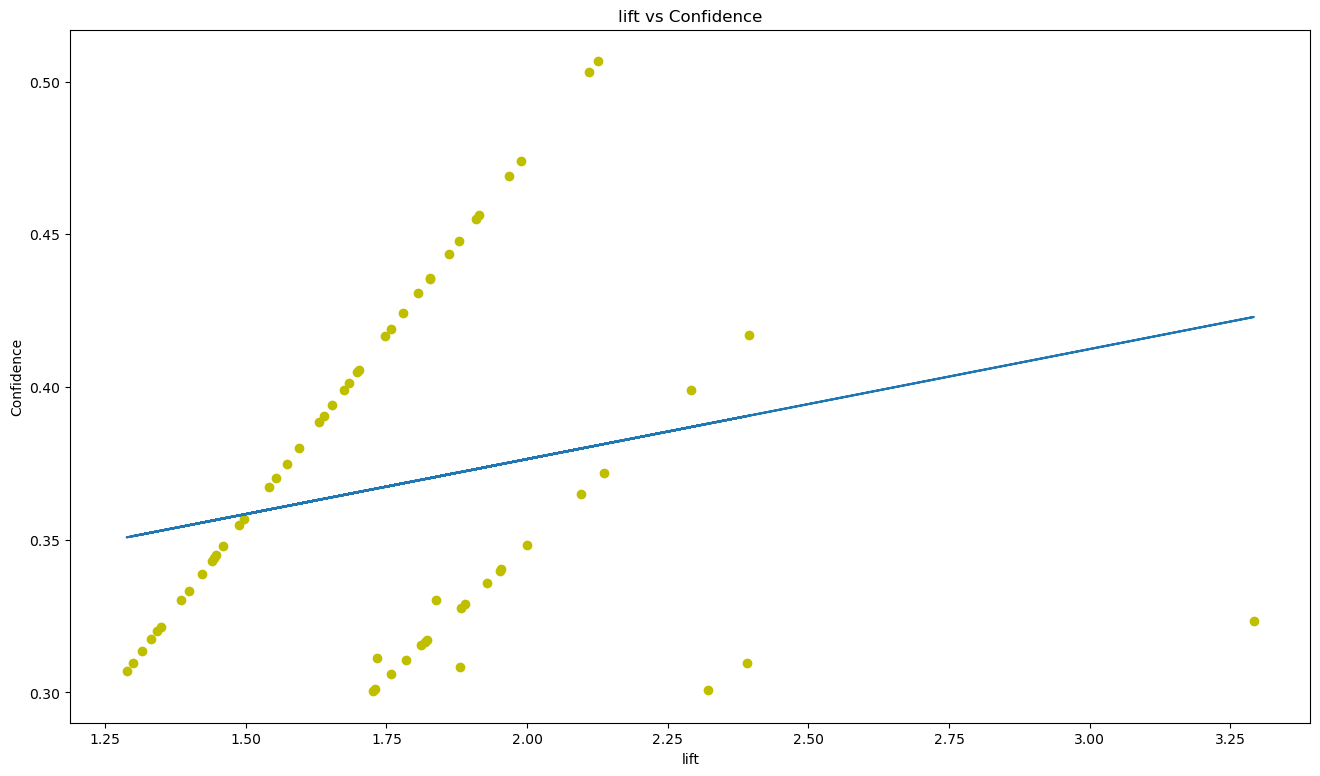

In [131]:
plt.figure(figsize=(16,9))
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')

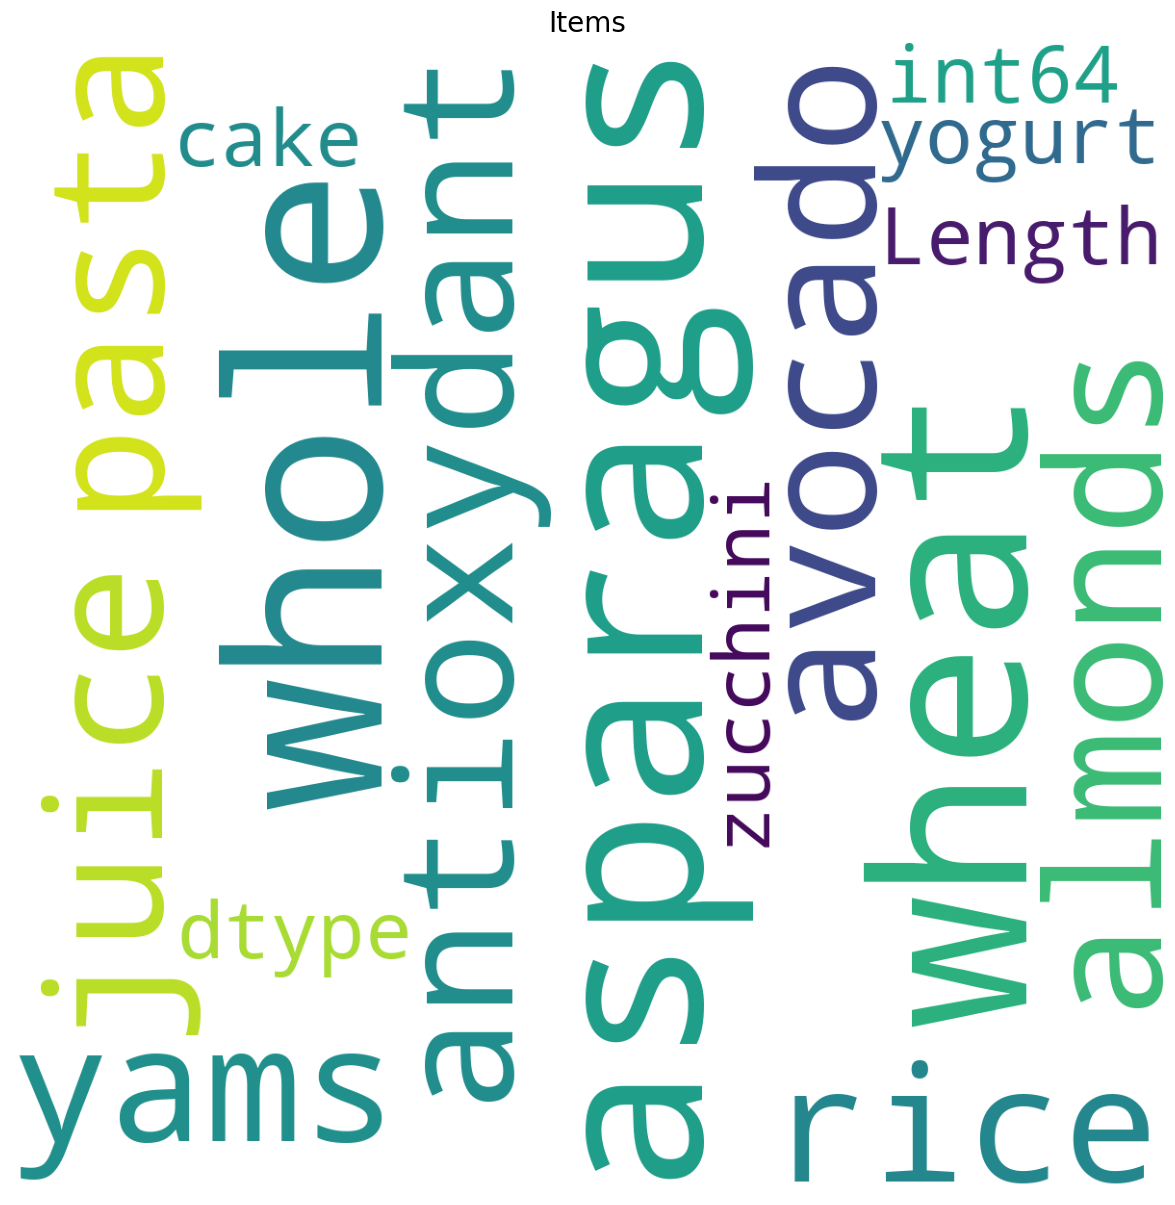

In [135]:
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(df.sum()))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()

### Association rules with 5% Support and 30% confidence

In [138]:
# With 5% Support
frequent_itemsets=apriori(df,min_support=0.05,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.087188,(burgers),1
1,0.081056,(cake),1
2,0.059992,(chicken),1
3,0.163845,(chocolate),1
4,0.080389,(cookies),1
5,0.051060,(cooking oil),1
6,0.179709,(eggs),1
7,0.079323,(escalope),1
8,0.170911,(french fries),1
9,0.063325,(frozen smoothie),1


In [140]:
# with 30% Confidence
rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,1.0,0.013604,1.122357,0.308965,0.150648,0.109018,0.271158
1,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,1.0,0.018223,1.159314,0.369437,0.169312,0.137421,0.296796


In [142]:

rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,1.0,0.018223,1.159314,0.369437,0.169312,0.137421,0.296796
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,1.0,0.013604,1.122357,0.308965,0.150648,0.109018,0.271158


In [144]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,1.0,0.013604,1.122357,0.308965,0.150648,0.109018,0.271158
1,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,1.0,0.018223,1.159314,0.369437,0.169312,0.137421,0.296796


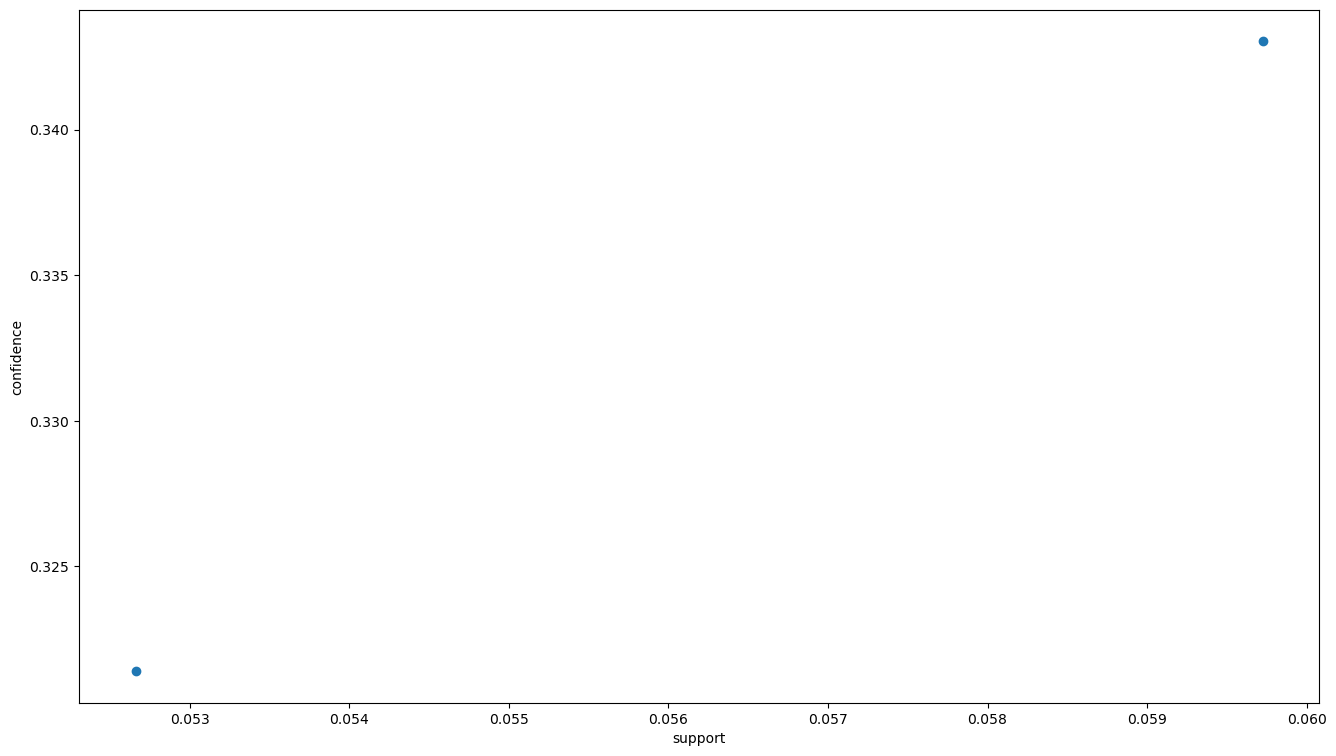

In [146]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [150]:
matrix = lift.pivot(index="antecedents", columns="consequents", values="lift")
matrix

consequents,(mineral water)
antecedents,
(chocolate),1.348332
(spaghetti),1.439085


(array([0.5]), [Text(0.5, 0, "frozenset({'mineral water'})")])

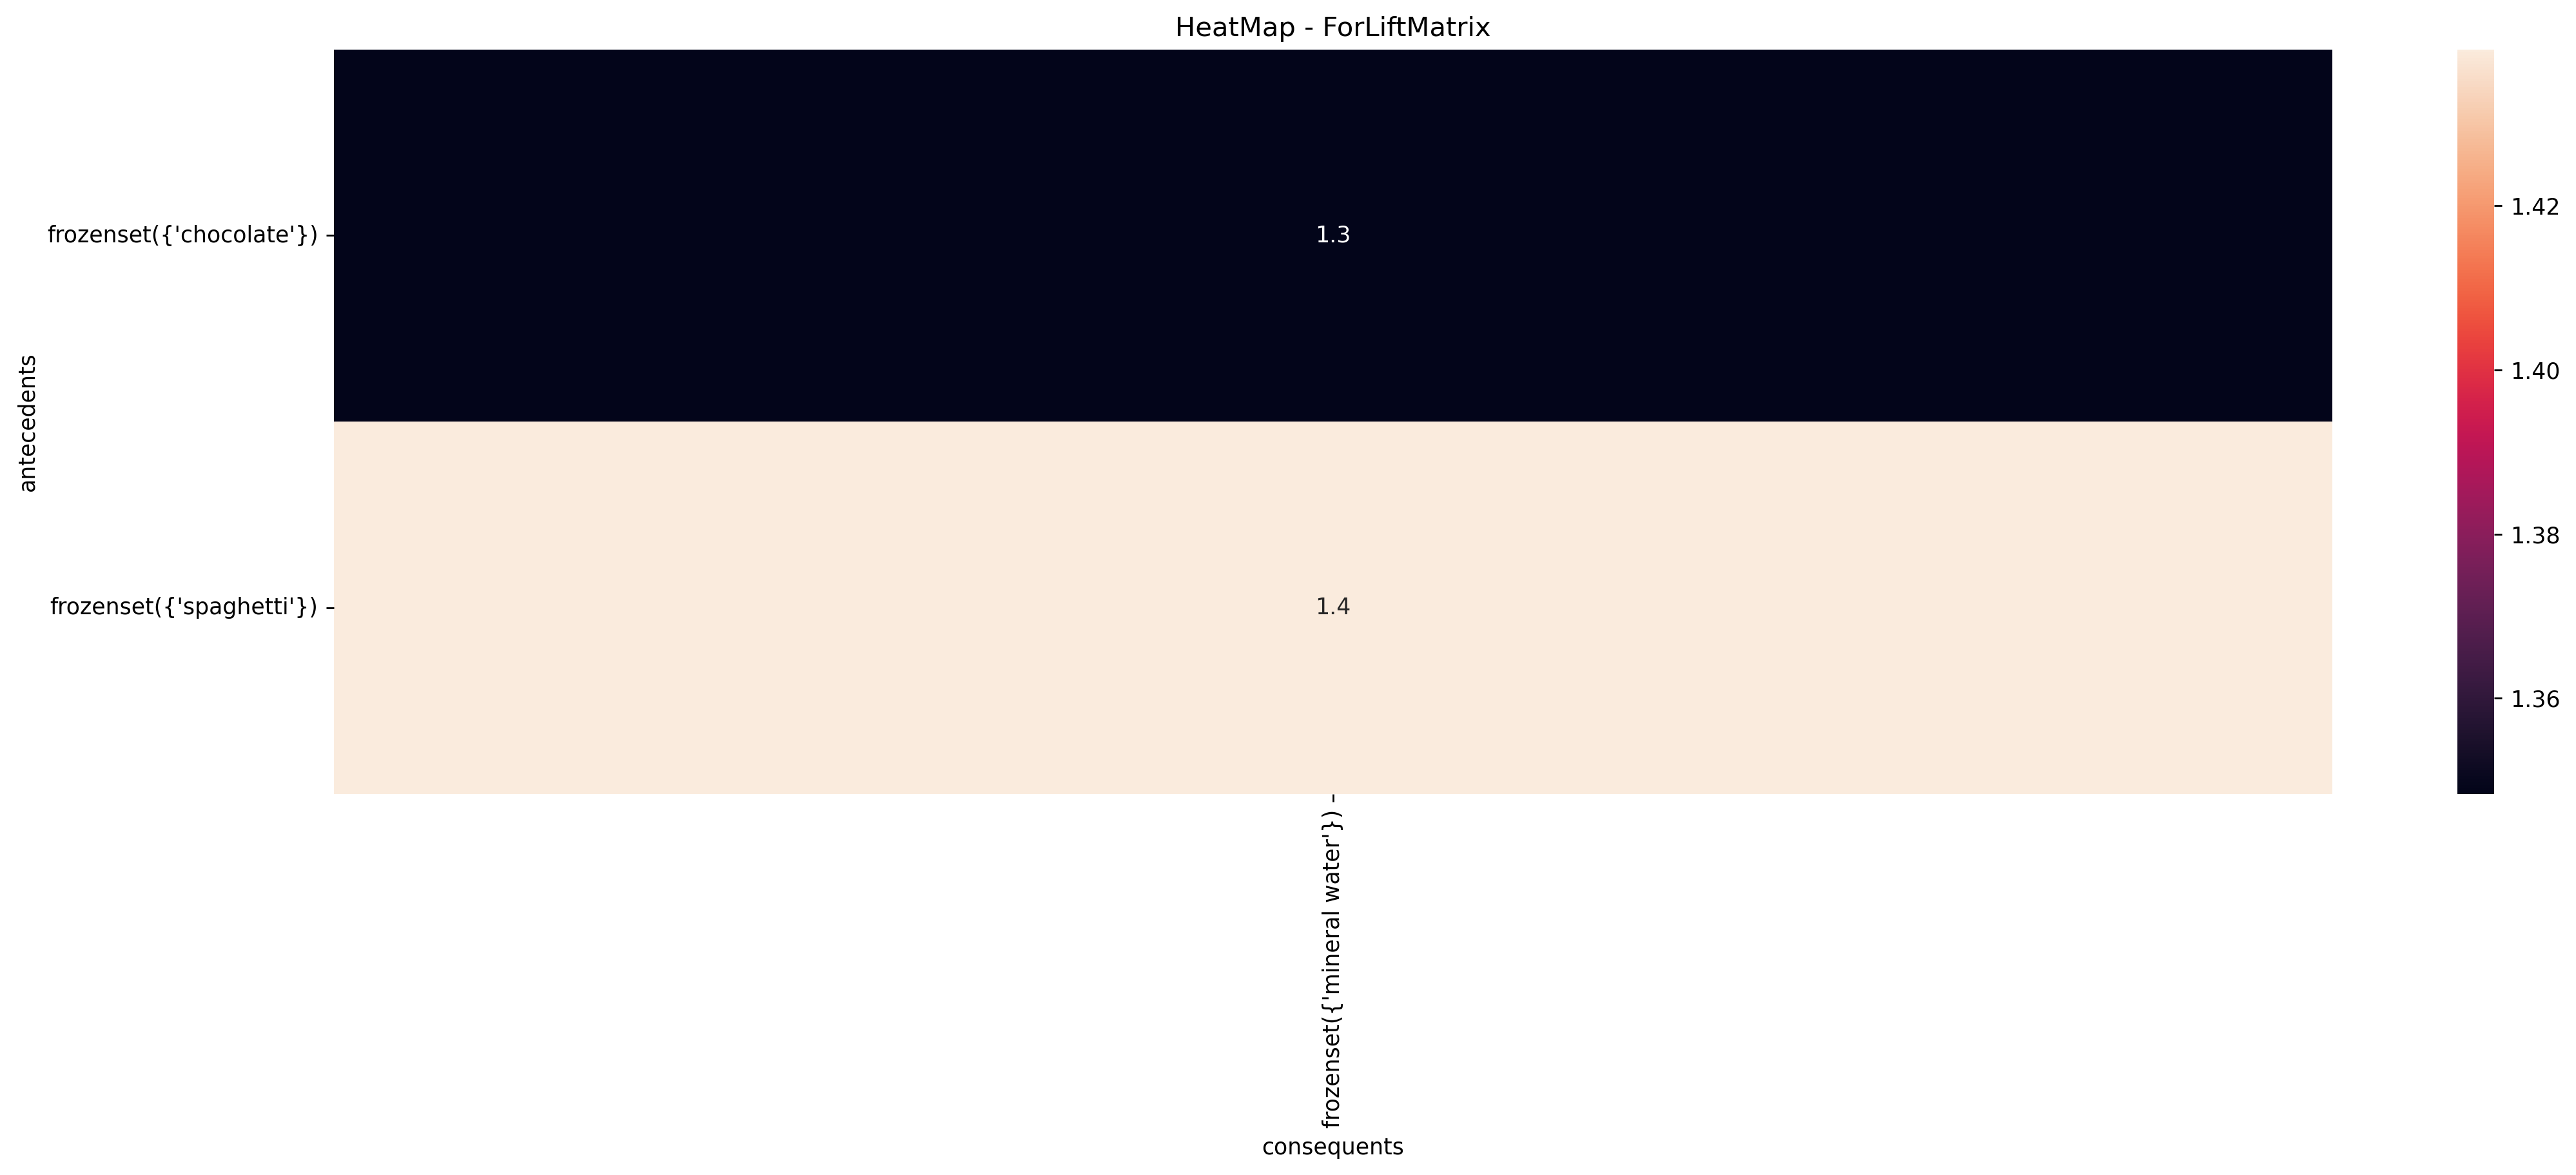

In [152]:
plt.figure(figsize=(20,6),dpi=250)
sns.heatmap(matrix,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

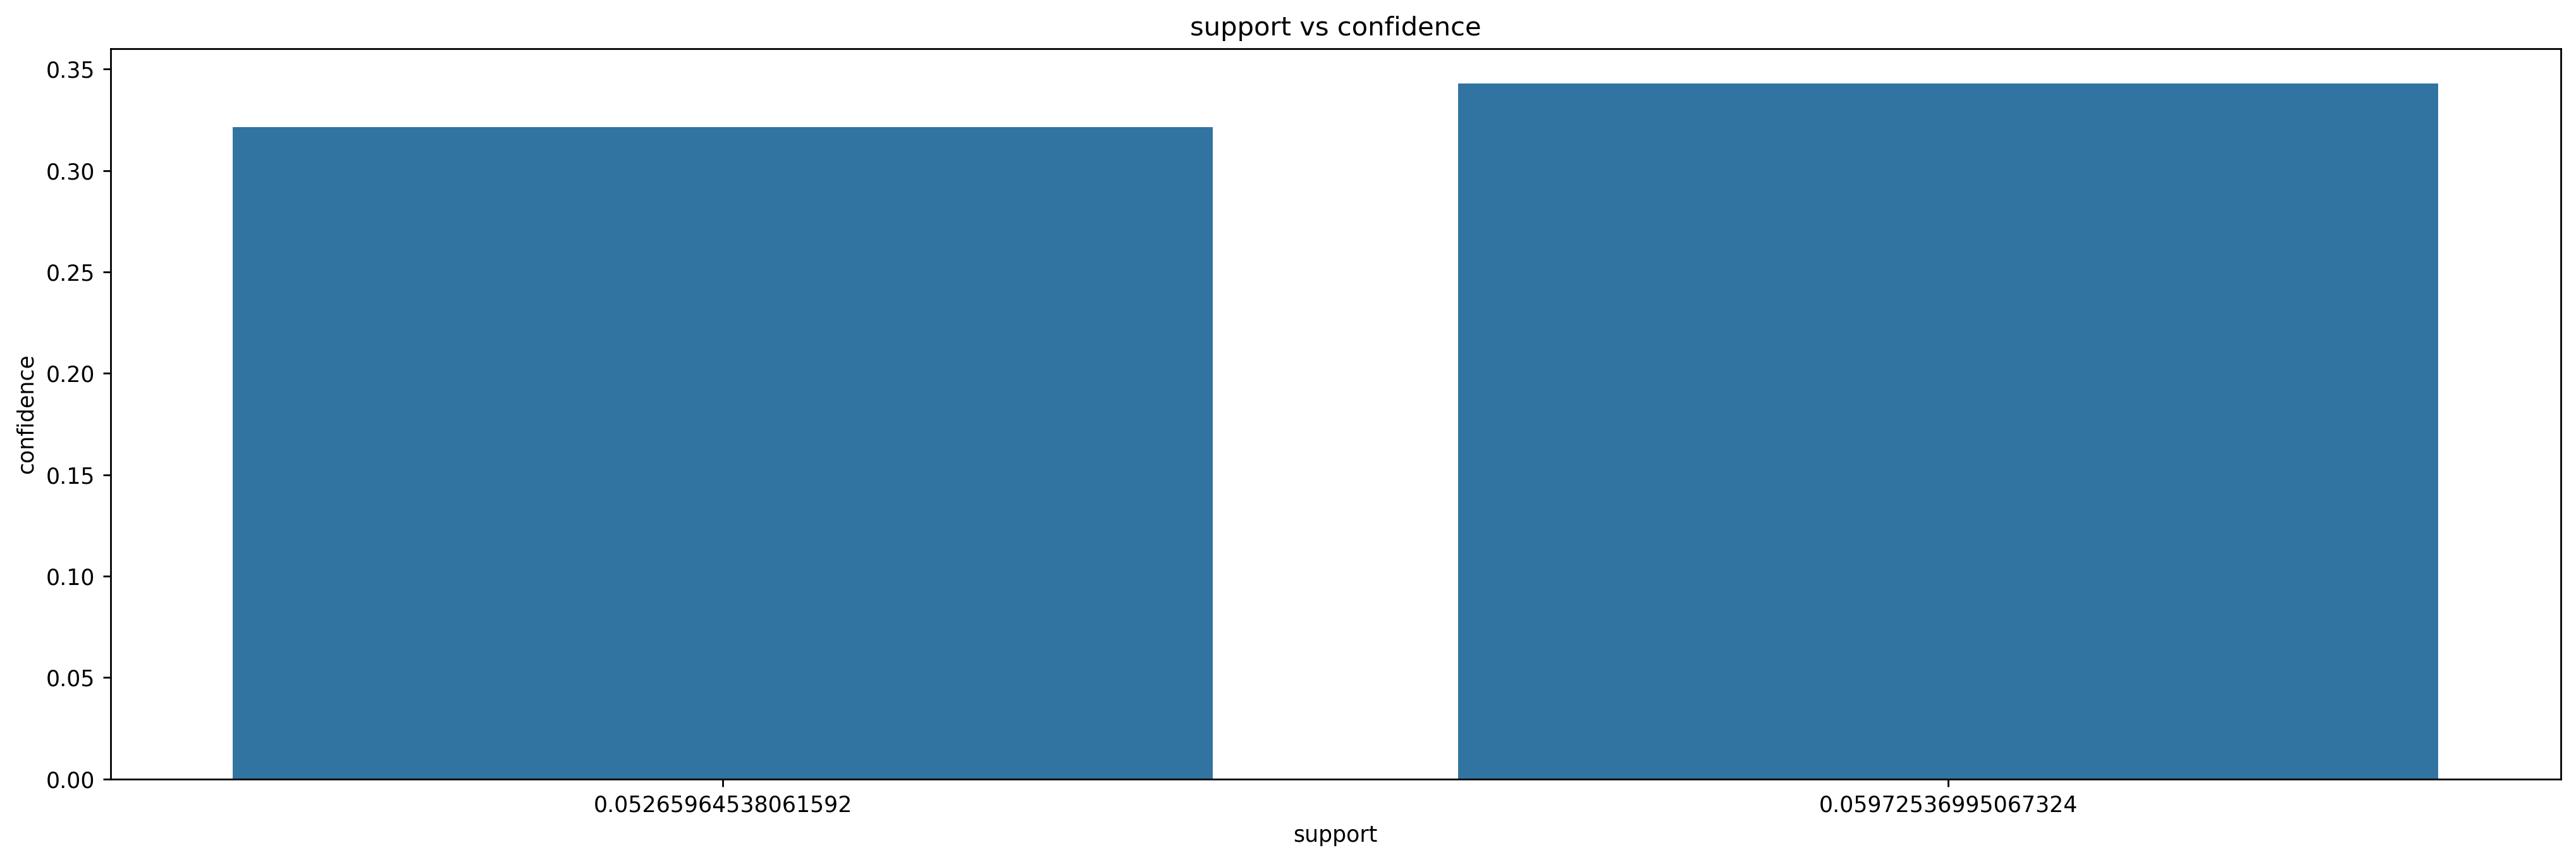

In [154]:
plt.figure(figsize=(20,6),dpi=250)
sns.barplot(x="support",y="confidence",data=lift)
plt.title("support vs confidence")
plt.show()

Text(0.5, 1.0, 'lift vs Confidence')

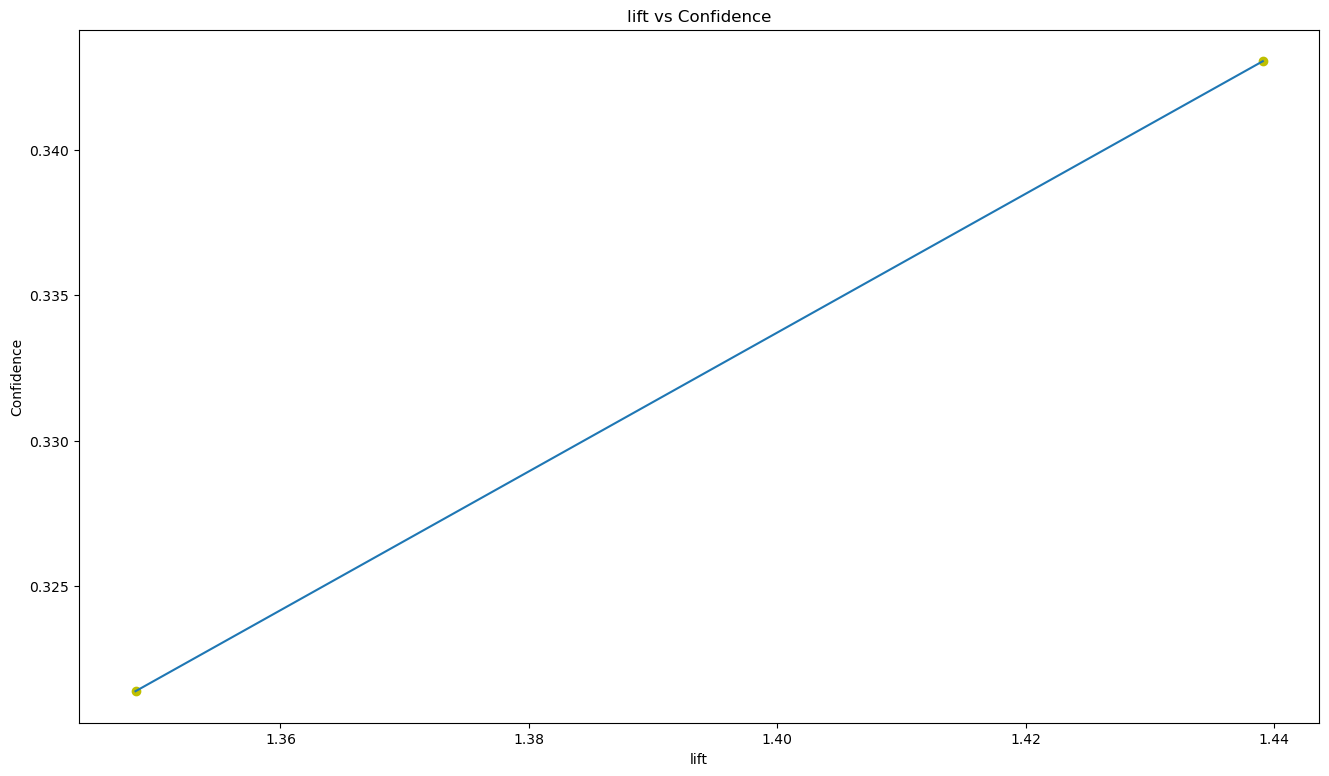

In [156]:
plt.figure(figsize=(16,9))
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')